In this project we are going to extrapolate some data with neural network

First adding torch library

In [ ]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

Now some data to work with

In [ ]:
data = [[1,4],[2,9],[3,15],[4,27],[5,35],[6,50],[7,70],[8,85],[9,100],[10,120]]

Defining our network, parameters and type of the loss function

In [ ]:
model = nn.Sequential(nn.Linear(1,7),nn.Linear(7,6),nn.Sigmoid(),nn.Linear(6,5),nn.Sigmoid(),nn.Linear(5,3))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03,momentum=0.9)

Start training and ploting loss value each time

The model is going to be trained in which the output parameters will become the coefficients of our desired extrapolating function. Here we want to extrapolate the data with a polynomial of degree 2.

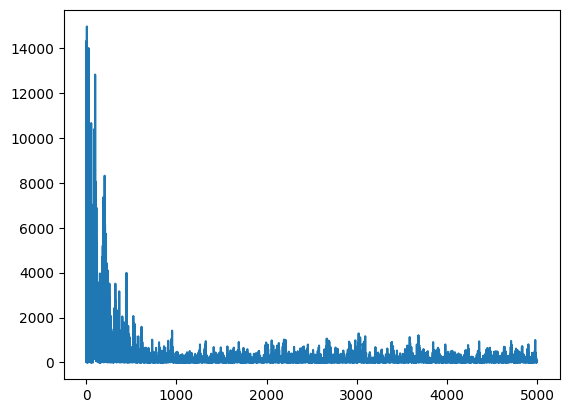

In [ ]:

loss_list=[]

N = 5000
for j in range(N):

    i = random.randint(0, 9)

    x = float(data[i][0])/100

    y = float(data[i][1])

    out_model_1 , out_model_2, out_model_3 = model(torch.tensor([x]))

    A = out_model_1.squeeze()
    B = out_model_2.squeeze()
    C = out_model_3.squeeze()

    loss = criterion((A*x**2+B*x+C), torch.tensor([y]))

    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(loss_list)


By using some external parameters, we can normalize our desired coefficients.

In [ ]:
loss_list[-1], A.item()/10000, B.item()/100, C.item()

(61.13312530517578, 0.021792324829101564, 12.8967578125, -22.209827423095703)

Now ploting the data and the desired extrapolating function.

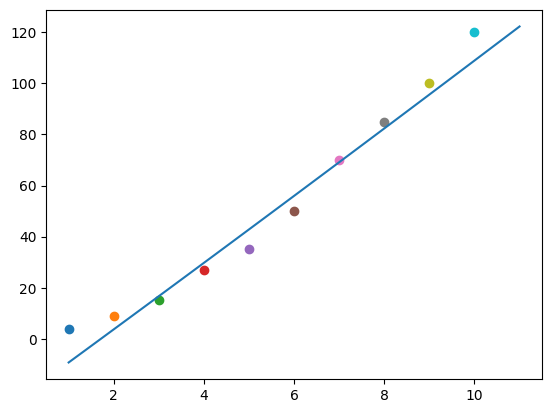

In [ ]:
import numpy as np

for i in data:
    plt.scatter(i[0],i[1])  # dots are the data

a,b,c = A.item()/10000, B.item()/100, C.item()
z = np.linspace(1, 11, 100)
plt.plot(z, (a*(z**2)+b*(z)+c)) # continuous curve is the polynomial

Now checking our work with defult function "polyregress".

In [ ]:
data = [[1,4],[2,9],[3,15],[4,27],[5,35],[6,50],[7,70],[8,85],[9,100],[10,120]]
xdata = [1,2,3,4,5,6,7,8,9,10]
ydata = [4,9,15,27,35,50,70,85,100,120]

In [ ]:
def polyregress(xdata,ydata,degree):
  return np.polynomial.polynomial.polyfit(xdata,ydata,degree)
polyregress(xdata,ydata,2)

array([-1.75      ,  3.55681818,  0.875     ])

error of polyregress:

when degree is 2 : 2.2

when degree is 1 : 7.44

it means that our model predicted better than polyfit even degree 1 and degree 2.

Although neural network and polyregress uses same error formula, which is MSE, but there is a difference. The neural network uses activation function between each layers. So the more important nodes will get higher weights and because of this the neural network takes the coefficient of x**2 much less and somehow it interpreted the data as a linear function.
But does the polyregress function has better precision with a linear function ( degree 1) ? No, we saw the error of that later.
So, the neural network finds a better polynomial, which is indeed degree 2, but in this domain values it is rather a degree 1 function.

What if the data is like an expotential function?

Using another network for this problem.

In [ ]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

In [ ]:
data2 = [[1,2],[2,4],[3,8],[4,15],[5,30],[6,70],[7,130],[8,300],[9,500],[10,1000]]

In [ ]:
model2 = nn.Sequential(nn.Linear(1,7),nn.Linear(7,6),nn.Sigmoid(),nn.Linear(6,5),nn.Sigmoid(),nn.Linear(5,3))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005,momentum=0.9)

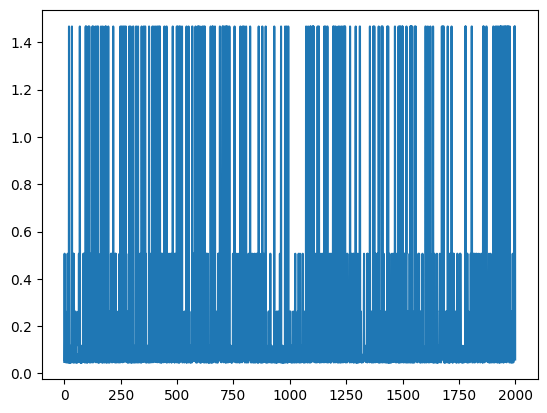

In [ ]:

loss2_list=[]


for j in range(2000):

    i = random.randint(0, 9)

    x = float(data2[i][0])/1000

    y = float(data2[i][1])/1000

    out_model2_1 , out_model2_2, out_model2_3 = model2(torch.tensor([x]))

    A2 = out_model2_1.squeeze()
    B2 = out_model2_2.squeeze()
    C2 = out_model2_3.squeeze()

    loss = criterion((A2*x**2+B2*x+C2), torch.tensor([y]))

    loss2_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(loss2_list)


In [ ]:
loss2_list[-1]

0.058680228888988495

In [ ]:
data2 = [[1,2],[2,4],[3,8],[4,15],[5,30],[6,70],[7,130],[8,300],[9,500],[10,1000]]
xdata2=[]
ydata2=[]
for j in data2:
    xdata2.append(j[0]/1000)
    ydata2.append(j[1]/1000)
xdata2 ,ydata2

([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
 [0.002, 0.004, 0.008, 0.015, 0.03, 0.07, 0.13, 0.3, 0.5, 1.0])

In [ ]:
np.polynomial.polynomial.polyfit(xdata2,ydata2,2)


array([ 2.19016667e-01, -1.58214394e+02,  2.22613636e+04])

error of polyfit:

error of degree 2 : 0.08

neural network error: 0.058 !!!

it shows that neural network extrapolates better!